# Image stitching

In [1]:
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt

**Carregar imagens**

In [2]:
images = []

for i in range(1,5):
    img = cv2.imread(f'images/ic{i}.png')
    images.append(img)

**Costura**

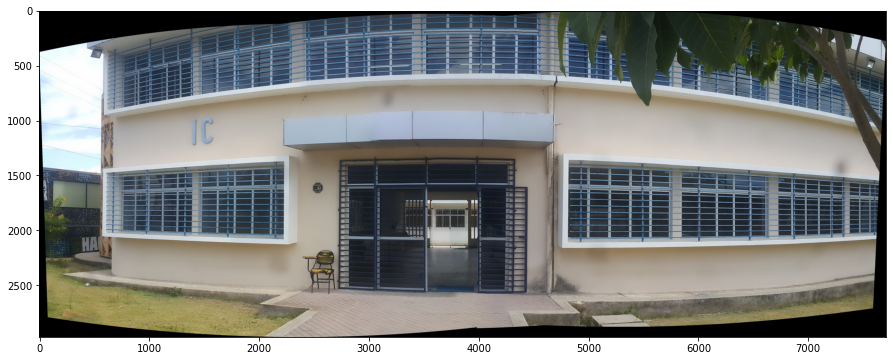

In [3]:
stitcher = cv2.createStitcher() if imutils.is_cv3() else cv2.Stitcher_create()
stitched = stitcher.stitch(images)[1]
stitched = cv2.cvtColor(stitched, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(16, 6))
plt.imshow(stitched)
plt.show()

**Corte**

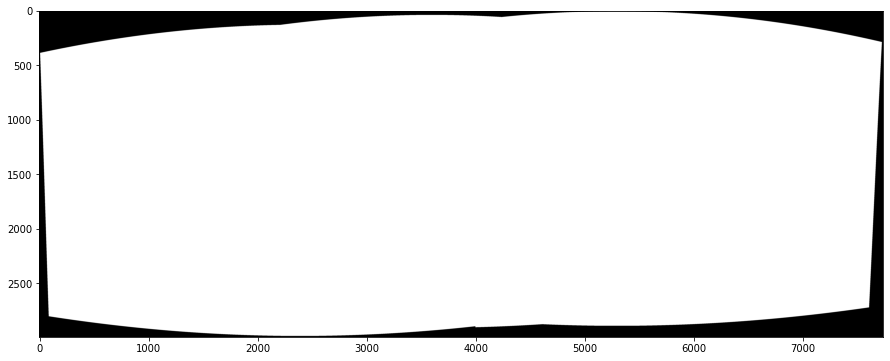

In [4]:
# Cria uma borda de 10px ao redor da imagem costurada
stitched_border = cv2.copyMakeBorder(stitched, 10, 10, 10, 10, cv2.BORDER_CONSTANT, (0, 0, 0))
# Converte para escala de cinza
gray = cv2.cvtColor(stitched_border, cv2.COLOR_RGB2GRAY)
# Classifica os valores dos pixels
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)[1]

plt.figure(figsize=(16, 6))
plt.imshow(thresh, cmap='gray')
plt.show()

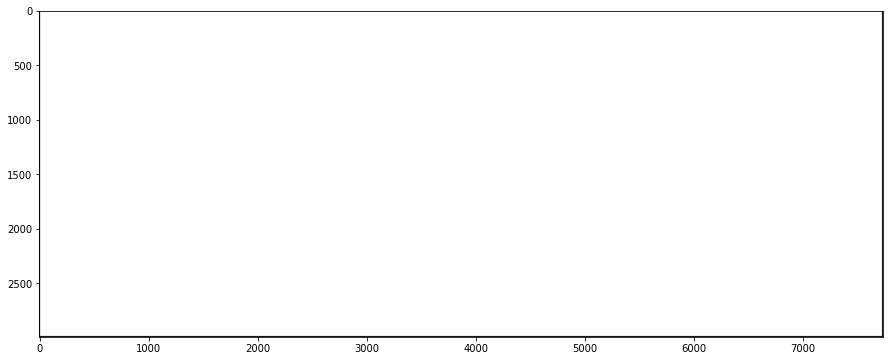

In [5]:
# Encontra todos os contornos externos
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
# Escolhe o maior contorno
c = max(cnts, key=cv2.contourArea)
# Cria uma máscara para região de corte
mask = np.zeros(thresh.shape, dtype="uint8")
(x, y, w, h) = cv2.boundingRect(c)
mask = cv2.rectangle(mask, (x, y), (x + w, y + h), 255, -1)

plt.figure(figsize=(16, 6))
plt.imshow(mask, cmap='gray')
plt.show()

In [6]:
# Cria cópia da máscara para região retangular mínima
min_rect = mask.copy()
# Cria cópia da máscara para contar px a serem removidos
sub = mask.copy()

while cv2.countNonZero(sub) > 0:
    min_rect = cv2.erode(min_rect, None)
    sub = cv2.subtract(min_rect, thresh)

In [7]:
# Encontra contornos na máscara retangular mínima
cnts = cv2.findContours(min_rect.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
c = max(cnts, key=cv2.contourArea)
# Extrai as coordenadas da caixa delimitadora
(x, y, w, h) = cv2.boundingRect(c)
# Aplica as coordenadas da caixa delimitadora
stitched_image = stitched[y:y + h, x:x + w]

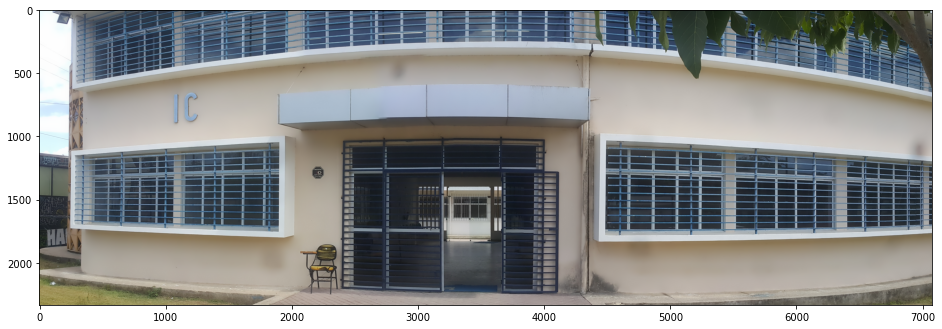

In [8]:
cv2.imwrite('images/ic.png', stitched_image)

plt.figure(figsize=(16, 6))
plt.imshow(stitched_image)
plt.show()